In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn import tree

sns.set(style="darkgrid")
pd.set_option("display.precision", 10)

# Mengambil directory dan input file awal

In [13]:
cwd = os.getcwd()
input_dir = os.path.join(cwd, 'input')
output_dir = os.path.join(cwd, 'output')
features = os.path.join(output_dir, 'features_without_high_correlated_value.csv')

In [14]:
df = pd.read_csv(features)

In [15]:
df

,amplitude__energy_ratio_by_chunks__num_segments_10__segment_focus_3,amplitude__kurtosis,amplitude__ratio_beyond_r_sigma__r_1,amplitude__ratio_beyond_r_sigma__r_3,amplitude__binned_entropy__max_bins_10,amplitude__ratio_beyond_r_sigma__r_0.5,amplitude__energy_ratio_by_chunks__num_segments_10__segment_focus_9,amplitude__energy_ratio_by_chunks__num_segments_10__segment_focus_8,amplitude__large_standard_deviation__r_0.1,amplitude__ratio_beyond_r_sigma__r_5,...,"amplitude__fft_coefficient__attr_""imag""__coeff_56","amplitude__fft_coefficient__attr_""abs""__coeff_81","amplitude__fft_coefficient__attr_""imag""__coeff_64","amplitude__fft_coefficient__attr_""real""__coeff_84","amplitude__fft_coefficient__attr_""real""__coeff_17","amplitude__fft_coefficient__attr_""abs""__coeff_82","amplitude__fft_coefficient__attr_""angle""__coeff_88","amplitude__fft_coefficient__attr_""angle""__coeff_98","amplitude__fft_coefficient__attr_""abs""__coeff_74","amplitude__fft_coefficient__attr_""imag""__coeff_16"
0,0.4695131897,5.9596787552,0.2007992008,0.022977023,1.2171022359,0.4165834166,0.0248113930,0.0214829799,0.0,0.002997003,...,0.7980203501,4.0106274568,5.4567721145,-7.8720642491,-0.2559359816,4.7814387042,-174.3800491581,-3.7875926325,7.8934893746,0.2975099935
1,0.3265442118,10.8458527262,0.1660000000,0.022000000,1.0957101418,0.3710000000,0.0093517693,0.0106523746,0.0,0.006000000,...,-0.2880842844,1.5074280968,1.1352598473,-2.4711056985,0.3030635229,2.6475660372,29.2914526326,15.3244667237,0.8108321982,0.7507887297
2,0.3454570172,3.7233895254,0.2210000000,0.020000000,1.3103420803,0.4700000000,0.0321583306,0.0189159916,0.0,0.001000000,...,2.6919452644,2.4996681561,0.6469656190,-4.8939413556,1.5457284620,4.4729787635,78.1269248730,142.8775092189,16.0034139726,0.2440288697
3,0.3567146921,5.2847552092,0.2150000000,0.019000000,1.1427854549,0.4180000000,0.0115551234,0.0163451928,0.0,0.003000000,...,-2.9474541443,1.1142644630,-0.7746749017,1.1906342349,-1.0385847678,2.0178554552,-79.6124732914,51.0239734903,2.3971579095,-0.1625637309
4,0.3491768673,2.9322988149,0.2090000000,0.022000000,1.6147284112,0.4160000000,0.0138947955,0.0178565889,1.0,0.000000000,...,3.4429823148,9.8652356490,0.6468613503,8.9847988743,-0.0316729594,8.6061316213,-73.5213408378,-61.0726809952,36.5599949438,-0.2106943304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2109,0.1366882946,0.0018996861,0.3126873127,0.000999001,1.8846058442,0.5914085914,0.0400593453,0.0291000867,1.0,0.000000000,...,0.0092737299,0.0378239039,0.2382465447,0.0654739110,-0.8551713477,0.3759687443,-45.4787935760,-37.0665391539,0.3430402797,-0.6239532248
2110,0.1889252479,1.0143742213,0.2890000000,0.008000000,1.7253983048,0.5120000000,0.0307510079,0.1565118361,1.0,0.000000000,...,24.4989336941,13.6348275746,-50.9306200884,-6.4801050158,1.4613141926,2.2750942739,123.7503868897,155.4117744509,5.1929747193,0.1773905686
2111,0.1232554300,1.9562094686,0.2510000000,0.014000000,1.5483737507,0.5320000000,0.0322291668,0.0494705113,1.0,0.000000000,...,-0.9606018024,1.0519402343,0.9739612097,-2.1399532128,0.3797597567,0.9420018547,61.4538973223,-30.8466692343,3.6856539678,-0.5414002693
2112,0.1139444613,1.0444359043,0.2760000000,0.008000000,1.7228621425,0.5370000000,0.0714661646,0.1090432233,1.0,0.000000000,...,-4.1812985979,2.6885114476,-1.5090634561,18.1759745574,-1.6068572741,8.3551929201,-165.5440018165,5.8973752485,20.5717954540,0.9636790627


Mengambil data label atau target

In [16]:
y = pd.read_csv(os.path.join(input_dir, 'label.csv'), index_col=0)
y = y['label']
y

1       1
2       1
3       1
4       1
5       1
       ..
2110    2
2111    2
2112    2
2113    2
2114    2
Name: label, Length: 2114, dtype: int64

---

# Membagi data menjadi data untuk *training* dan *test*

1. Variabel `X_train` merupakan data berisikan semua nilai *features* dan akan digunakan untuk *training model*. Pada kasus ini digunakan 70% data.
2. Variabel `X_test` adalah variabel yang digunakan untuk *test model*. Data ini berjumlah 30% data.
3. Variabel `y_train` adalah `label` atau `target` atau `class` yang berisikan nilai dari prediksi untuk *training model*.
4. Variabel `y_test` adalah `label` atau `target` atau `class` yang berisikan nilai dari prediksi untuk *test model*.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.3, random_state = 0)

In [18]:
print('Jumlah Data untuk training : {}'.format(X_train.shape))

Jumlah Data untuk training : (1479, 429)


In [19]:
print('Jumlah Data untuk test : {}'.format(X_test.shape))

Jumlah Data untuk test : (635, 429)


---

# Training menggunakan Random Forest Classifier

Menambahkan variabel `n_estimators` dan `max_depth` untuk Random Forest Classifier

In [20]:
n_estimators = 100
max_depth = 5

In [21]:
rfc = RandomForestClassifier(
    n_estimators = n_estimators, 
    max_depth = max_depth, 
    random_state=17
)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

In [22]:
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. 
      format(accuracy_score(y_test, y_pred)))
print('Root Mean Squared Error with 100 decision-trees : {0:0.4f}'.
      format(np.sqrt(mean_squared_error(y_test, y_pred))))

Model accuracy score with 100 decision-trees : 0.9811
Root Mean Squared Error with 100 decision-trees : 0.1375


---

# Menghitung nilai Features Importance

In [23]:
features_importance = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

In [24]:
features_importance = features_importance.to_frame()

features_importance.reset_index(drop=False, inplace=True)

features_importance = features_importance.rename(columns={
    'index':'features',
    0 : 'score',
})

In [25]:
features_importance

,features,score
0,amplitude__kurtosis,0.0662309506
1,amplitude__ratio_beyond_r_sigma__r_3,0.0653174927
2,amplitude__energy_ratio_by_chunks__num_segment...,0.0520284416
3,amplitude__energy_ratio_by_chunks__num_segment...,0.0472692829
4,amplitude__ratio_beyond_r_sigma__r_0.5,0.0362817475
...,...,...
424,"amplitude__fft_coefficient__attr_""real""__coeff_11",0.0000000000
425,"amplitude__fft_coefficient__attr_""imag""__coeff_34",0.0000000000
426,"amplitude__fft_coefficient__attr_""angle""__coef...",0.0000000000
427,"amplitude__fft_coefficient__attr_""real""__coeff_25",0.0000000000


In [27]:
features_importance.describe()

,score
count,429.0000000000
mean,0.0023310023
std,0.0070362021
min,0.0000000000
25%,0.0000440123
50%,0.0001802495
75%,0.0009940417
max,0.0662309506


In [28]:
quantile_75 = features_importance.describe().loc['75%','score']

Mengambil *features* yang memiliki *score* lebih dari nilai quantile 0.75

In [29]:
features_importance = features_importance[features_importance['score'] > quantile_75]

In [30]:
features_importance

,features,score
0,amplitude__kurtosis,0.0662309506
1,amplitude__ratio_beyond_r_sigma__r_3,0.0653174927
2,amplitude__energy_ratio_by_chunks__num_segment...,0.0520284416
3,amplitude__energy_ratio_by_chunks__num_segment...,0.0472692829
4,amplitude__ratio_beyond_r_sigma__r_0.5,0.0362817475
...,...,...
102,"amplitude__fft_coefficient__attr_""abs""__coeff_24",0.0011656323
103,"amplitude__fft_coefficient__attr_""real""__coeff_6",0.0011443506
104,"amplitude__fft_coefficient__attr_""abs""__coeff_11",0.0011220683
105,"amplitude__fft_coefficient__attr_""abs""__coeff_77",0.0010346143


In [31]:
features_importance.describe()

,score
count,107.0000000000
mean,0.0088061638
std,0.0119734944
min,0.0010102309
25%,0.0020034630
50%,0.0043161420
75%,0.0098703417
max,0.0662309506


Menyimpan *features importance*

In [21]:
features_importance.to_csv(os.path.join(output_dir, 'features_importance.csv'), index=False)

---

# Plot nilai Features Importance 

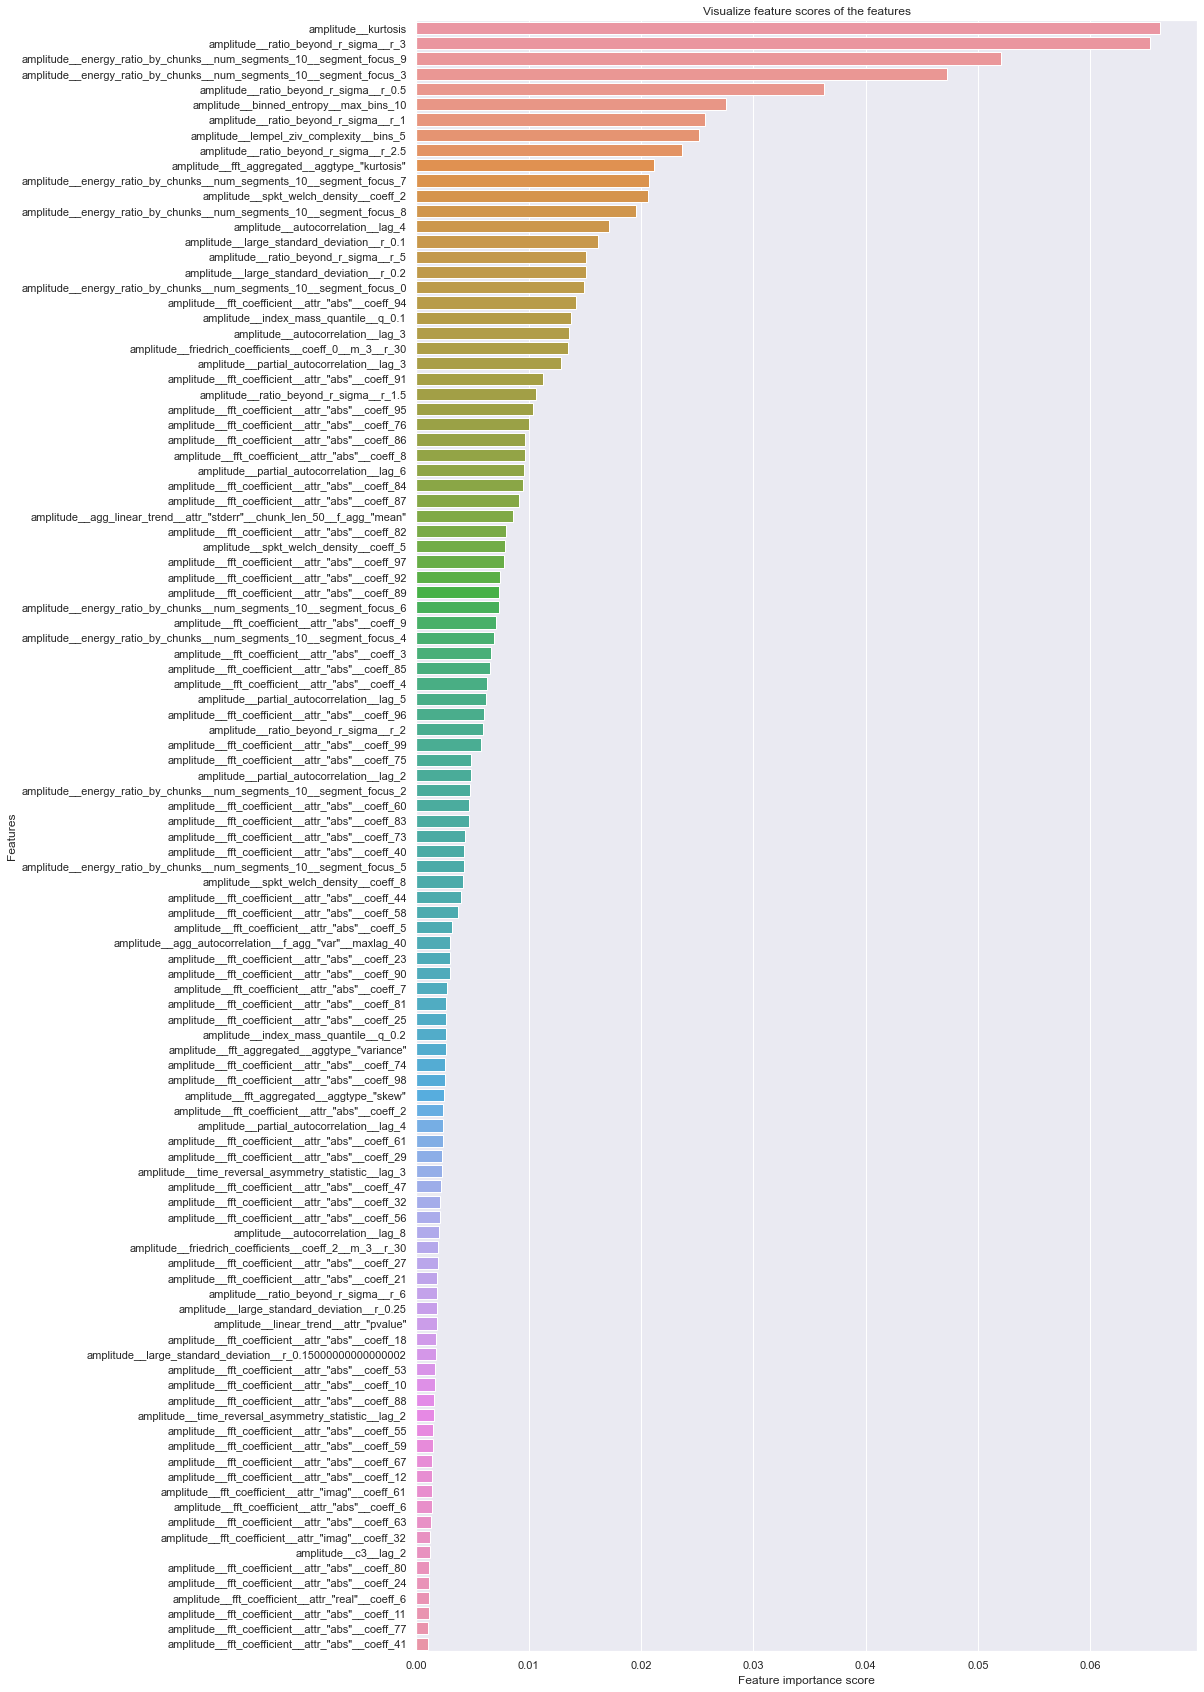

In [22]:
f, ax = plt.subplots(figsize=(14, 30))
filename = os.path.join(output_dir, 'features_importance_{}.tiff'.format(n_estimators))

ax = sns.barplot(x='score', y='features', data=features_importance)


ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(features_importance['features'])
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.savefig(filename, dpi=150, bbox_inches='tight')
plt.show()

---

# Confusion Matrix

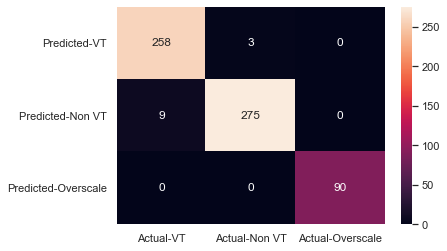

In [23]:
filename = os.path.join(output_dir, 'confusion_matriks_{}.tiff'.format(n_estimators))

cm = confusion_matrix(y_test, y_pred)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual-VT', 'Actual-Non VT', 'Actual-Overscale'], 
                                 index=['Predicted-VT', 'Predicted-Non VT', 'Predicted-Overscale'])

sns.heatmap(cm_matrix, annot=True, fmt='d')
plt.savefig(filename, dpi=150, bbox_inches='tight')
plt.show()

---

# Menyimpan Decison Tree 

In [24]:
def save_tree(index, pohon):
    filename = os.path.join(save_dir,'tree_{}.png'.format(index))
    fig = plt.figure(figsize=(20,12))
    tree.plot_tree(
        pohon,
        filled=True,
        class_names=["vt", "non-vt","overscale"],
        fontsize=12,
        node_ids=True,
    )

    fig.savefig(filename, bbox_inches='tight')
    plt.close()

In [25]:
save_dir = os.path.join(output_dir, 'trees')
tree_list = rfc.estimators_

for index, pohon in enumerate(tree_list):
    save_tree(index, pohon)